# Kernel methods illustration

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

%matplotlib inline

## 1. Simulation of a dataset

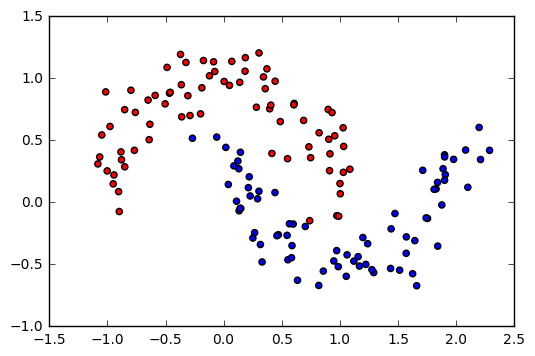

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split

# Simulation of data
X, y = make_moons(n_samples=150, noise=0.15, random_state=1)

# We split the dataset into training and a testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=14)
    
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

## 2. Linear classifiers

### 2.1 A function to plot the decision functions and AUC

In [3]:
def plot_clf(classifiers, names, X_train, y_train, X_test, y_test, C=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(4 * len(classifiers), 3))
    
    for i, (name, clf) in enumerate(zip(names, classifiers)):
        ax = plt.subplot(1, len(classifiers), i + 1)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ct = ax.contourf(xx, yy, Z, cmap=cm, alpha=.7)        
        plt.colorbar(ct)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if C is None:
            plt.title(name, fontsize=14)
        else:
            plt.title(name + " [C=%.0e]" % C, fontsize=14)
            
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

    plt.tight_layout()

### 2.2. Training of linear classifiers: logistic regression and linear SVM, and their decision functions

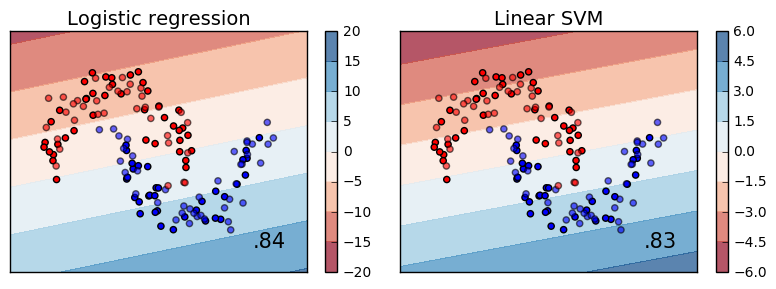

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Regularization
C = 1e2

classifiers = [
    LogisticRegression(C=C),
    LinearSVC(C=C)
]

names = ["Logistic regression", "Linear SVM"]

plot_clf(classifiers, names, X_train, y_train, X_test, y_test)

### 2.3 Training of linear classifiers on polynomial features

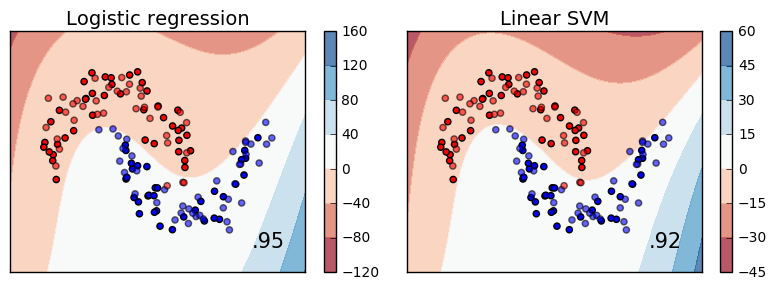

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures

classifiers = []

clf = Pipeline([("polyn", PolynomialFeatures(degree=3)),
                ("classifier", LogisticRegression(C=C))])
classifiers.append(clf)

clf = Pipeline([("polyn", PolynomialFeatures(degree=3)),
                ("classifier", LinearSVC(C=C))])
classifiers.append(clf)

names = ["Logistic regression", "Linear SVM"]

plot_clf(classifiers, names, X_train, y_train, X_test, y_test)

### 2.4 Effect of the level of regularization

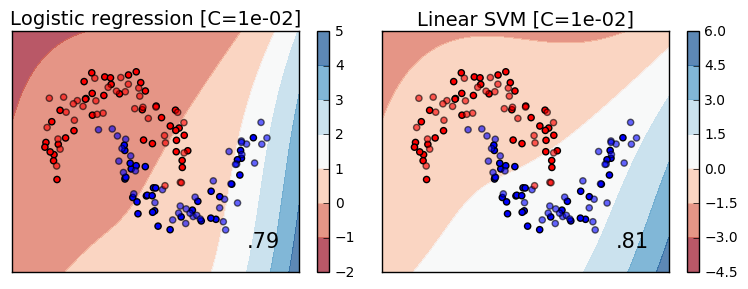

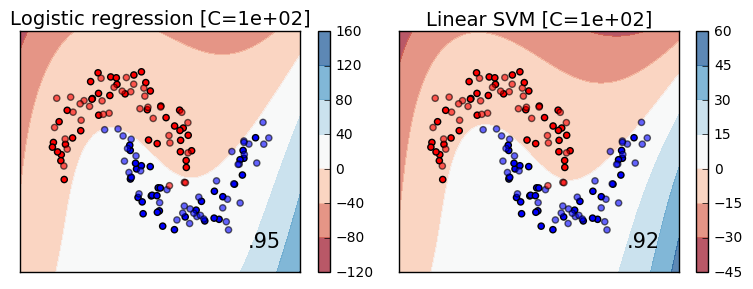

In [6]:
for C in [1e-2, 1e2]:
    for clf in classifiers:
        clf.set_params(classifier__C=C)
    plot_clf(classifiers, names, X_train, y_train, X_test, y_test, C=C)

## 3. Kernel SVMs

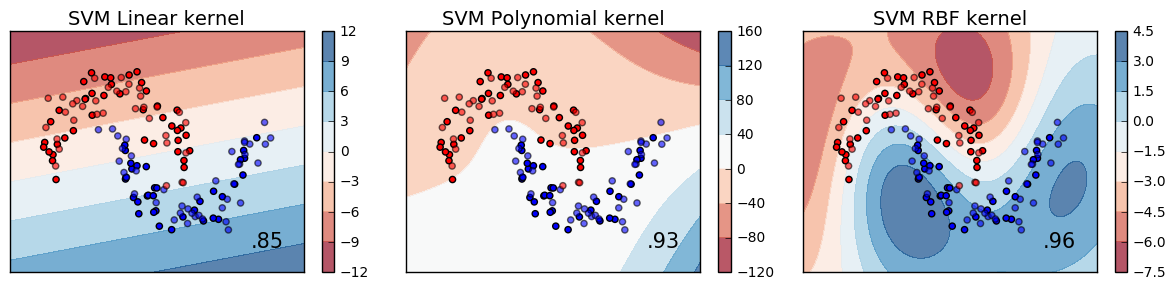

In [7]:
from sklearn.svm import SVC

classifiers = [
    SVC(C=C, kernel='linear'),
    SVC(C=C, kernel='poly', degree=3),
    SVC(C=C, kernel='rbf')
]

names = ["SVM Linear kernel",
         "SVM Polynomial kernel",
         "SVM RBF kernel"
        ]

plot_clf(classifiers, names, X_train, y_train, X_test, y_test)

In [8]:
clf = SVC(C=C, kernel='rbf')
clf.fit(X, y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

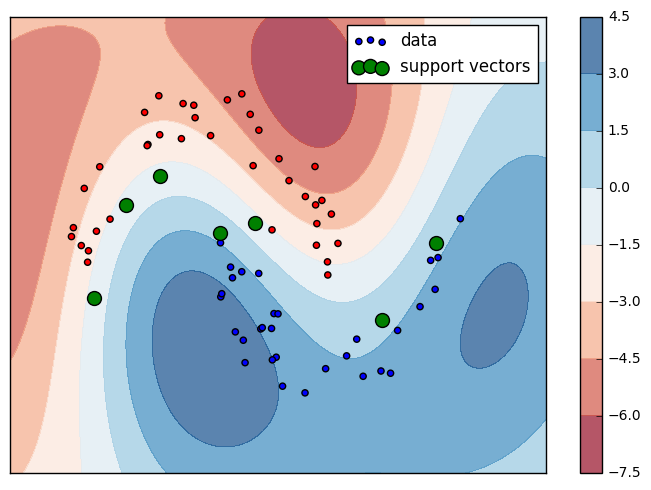

In [9]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(7, 5))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ct = plt.contourf(xx, yy, Z, cmap=cm, alpha=.7)        

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, label='data')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, cmap=cm_bright, c='green', label='support vectors')
plt.xticks(())
plt.yticks(())

plt.legend()

plt.colorbar(ct)
plt.tight_layout()